<a href="https://colab.research.google.com/github/barbarabraune/graficos_speckle/blob/main/tres_graf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# cd /content/drive/MyDrive/graficos_speckle/

/content/drive/MyDrive/graficos_speckle


In [25]:
df = pd.read_excel(r'100_certo.xlsx', usecols="G,H,CE") # trocar pelo caminho certo aqui

In [28]:
frames = []
for i in range(2517):
    frames.append(i)

In [123]:
db = df['8. ★D (D with highest r²) for Dʙ']
sigma = df['7. STANDARD DEVIATION (σ) for D for Dʙ']
lac = list(df['83. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎/Ǥɴ ∀ ɢ∈Ǥ'])

# Tratativa dos dados, substituindo "," por "."

Nossos dados estão salvos numa tabela do excel, portanto estão salvos em formato de texto, usando "," para indicar casas decimais. Como precisamos tratá-los como float no python, precisamos fazer essa tratativa

In [124]:
dbFloat = []

for dado in db:
    dbFloat.append(float(dado.replace(',', '.')))

sigmaFloat = []

for dado in sigma:
    sigmaFloat.append(float(dado.replace(',', '.')))

lacFloat = []

for dado in lac:
    lacFloat.append(float(dado.replace(',', '.')))

In [129]:
print(dbFloat[0::100])
print(sigmaFloat[0::100])
print(lacFloat[0::100])

[2.8781, 2.8761, 2.8578, 2.8413, 2.8387, 2.8448, 2.8437, 2.8347, 2.8432, 2.8386, 2.8535, 2.8466, 2.848, 2.8528, 2.8453, 2.8493, 2.8433, 2.8455, 2.8508, 2.8537, 2.8527, 2.8472, 2.8462, 2.8505, 2.8528, 2.8541]
[0.0007, 0.0006, 0.0009, 0.0012, 0.0028, 0.0021, 0.003, 0.0028, 0.0016, 0.0009, 0.0012, 0.002, 0.0021, 0.0016, 0.0021, 0.001, 0.0028, 0.0011, 0.0014, 0.0017, 0.0023, 0.0026, 0.0027, 0.0019, 0.0023, 0.0013]
[0.0159, 0.0159, 0.0212, 0.0281, 0.0257, 0.0248, 0.0266, 0.0282, 0.0247, 0.0282, 0.0227, 0.0234, 0.0241, 0.0226, 0.0231, 0.0234, 0.024, 0.0258, 0.0218, 0.0224, 0.0217, 0.0225, 0.023, 0.0217, 0.0223, 0.0216]


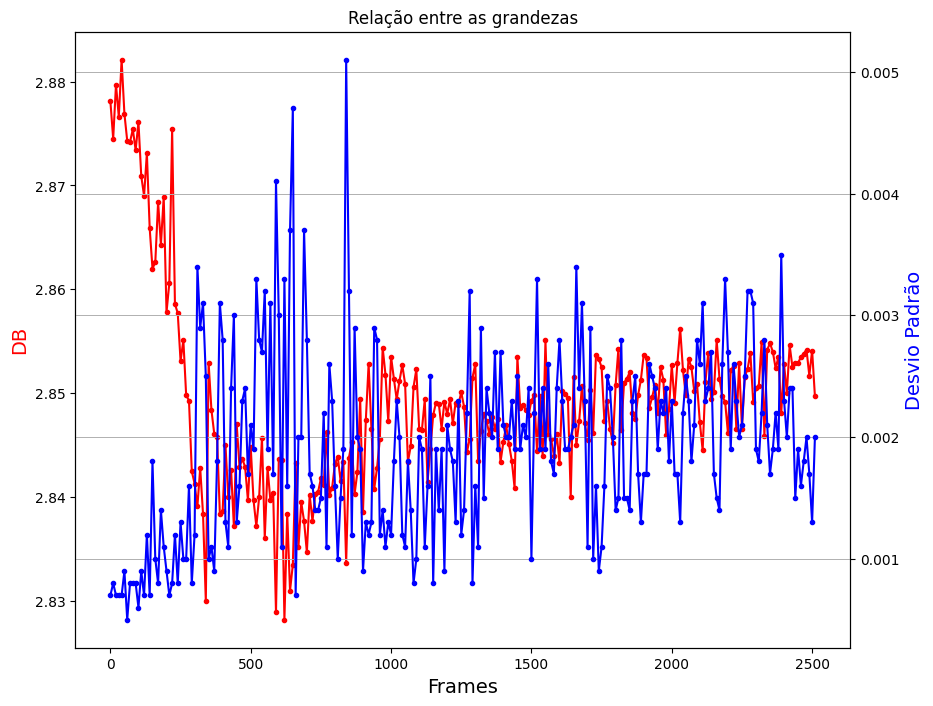

In [131]:
# create figure and axis objects with subplots()
fig = plt.figure(figsize=(10,8))
ax=fig.add_subplot()
# make a plot
ax.plot(frames[0::10],
        dbFloat[0::10],
        color="red",
        marker=".", 
        label='Db'
        )
# set x-axis label
ax.set_xlabel("Frames", fontsize = 14)
# set y-axis label
ax.set_ylabel("DB",
              color="red",
              fontsize=14)

# ax.set_ylim(valorMinimoY, valorMaximoY)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(frames[0::10], sigmaFloat[0::10],color="blue",marker=".", label='Desvio padrão')
ax2.set_ylabel("Desvio Padrão",color="blue",fontsize=14)
# ax.set_yticks(db[0::839])
# ax2.set_yticks(sigma[0::839])
plt.title("Relação entre as grandezas", fontdict=None,)
plt.grid(linestyle='-', linewidth=0.7)
plt.show()

# save the plot as a file
fig.savefig('tentando.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

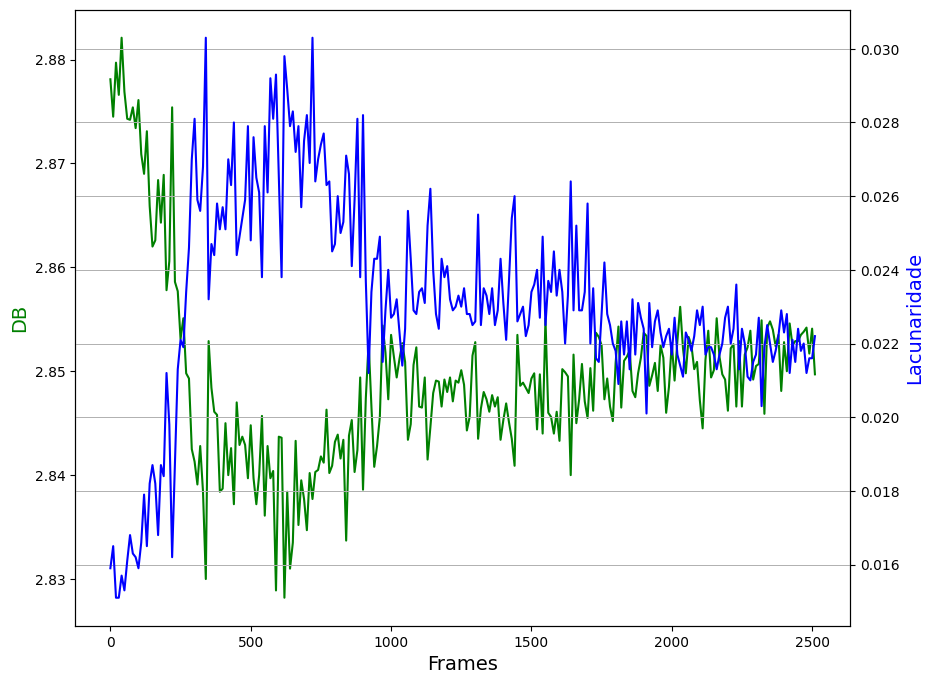

In [136]:
fig = plt.figure(figsize=(10,8))
ax1=fig.add_subplot()

ax2 = ax1.twinx()
ax1.plot(frames[0::10], dbFloat[0::10], 'g-')
ax2.plot(frames[0::10], lacFloat[0::10], 'b-')

ax1.set_xlabel('Frames', fontsize=14)
ax1.set_ylabel('DB', color='g', fontsize=14)
ax2.set_ylabel('Lacunaridade', color='b', fontsize=14)
plt.grid(linestyle='-', linewidth=0.7)
plt.show()


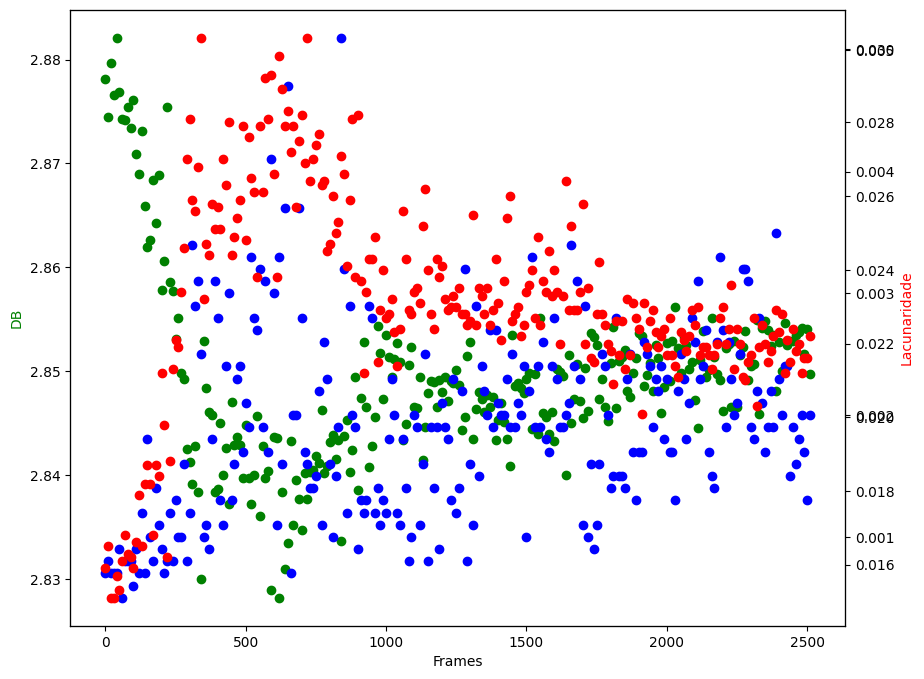

In [137]:
fig = plt.figure(figsize=(10,8))
ax1=fig.add_subplot()

ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax1.scatter(x=frames[0::10], y=dbFloat[0::10], c='g')
ax2.scatter(x=frames[0::10], y=sigmaFloat[0::10], c='b')
ax3.scatter(x=frames[0::10], y=lacFloat[0::10], c='r')

ax1.set_xlabel('Frames')
ax1.set_ylabel('DB', color='g')
ax3.set_ylabel('Lacunaridade', color='r')

plt.show()

fig.savefig('tentando.jpg',
            format='jpeg',
            dpi=80)

# Histogramas

Com a ideia de identificar o comportamento dos dados, vamos plotar alguns histogramas dos dados obtidos

In [143]:
import numpy as np

def Average(lst):
    return sum(lst) / len(lst)

def histogram(type_hist, data, varname, legendLocation, numberBins):
    
    media = Average(data)
    desvioPadrao = np.std(data)
    
    mu = media
    sigma = desvioPadrao
    
    # figname = 'hist_%s.png' %place

    fig1 = plt.figure(figsize=(10,8))
    axes = fig1.add_axes([0.1,0.1,0.8,0.8])
    
    n_bins = numberBins
        
    n, bins, patches = axes.hist(data, bins=n_bins, density=True, color='#1f77b4', label='Distribuição dos dados obtidos')
    
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

    axes.plot(bins, y, ls='--', color='#ff7f0e', label='Melhor fit da distribuição')
    
    axes.axvline(media, color='r', label='Média geral dos dados')
    
    axes.set_xlabel(varname)

    axes.set_title(f'Histograma dos dados obtidos')

    plt.grid(axis='y', linestyle='-', linewidth=0.5)
    ax = plt.gca() 
    axes.legend(loc=legendLocation)
    plt.show()

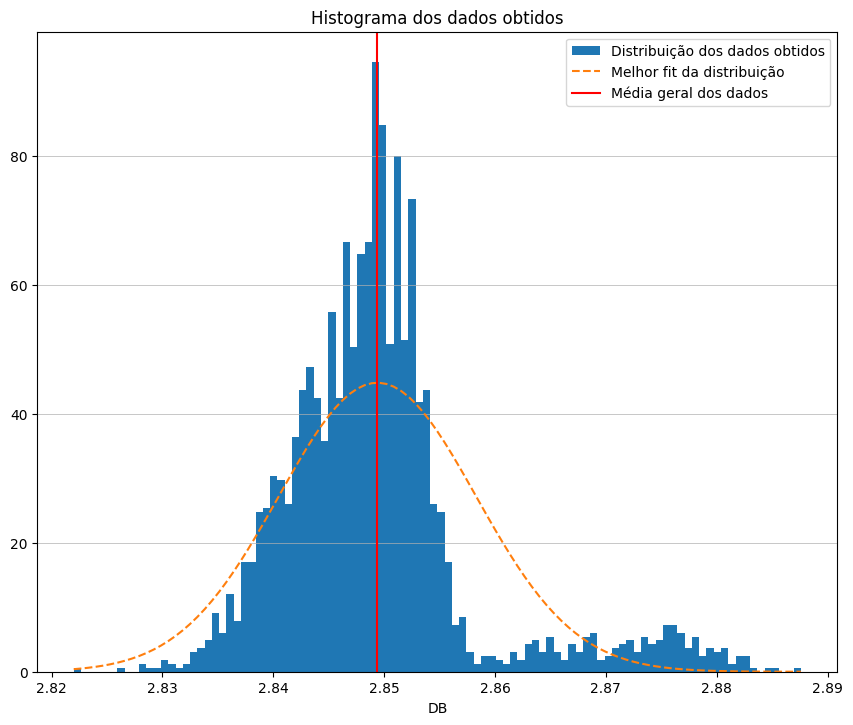

In [145]:
histogram('fixed_bins_size', dbFloat, 'DB', 'upper right', 100)

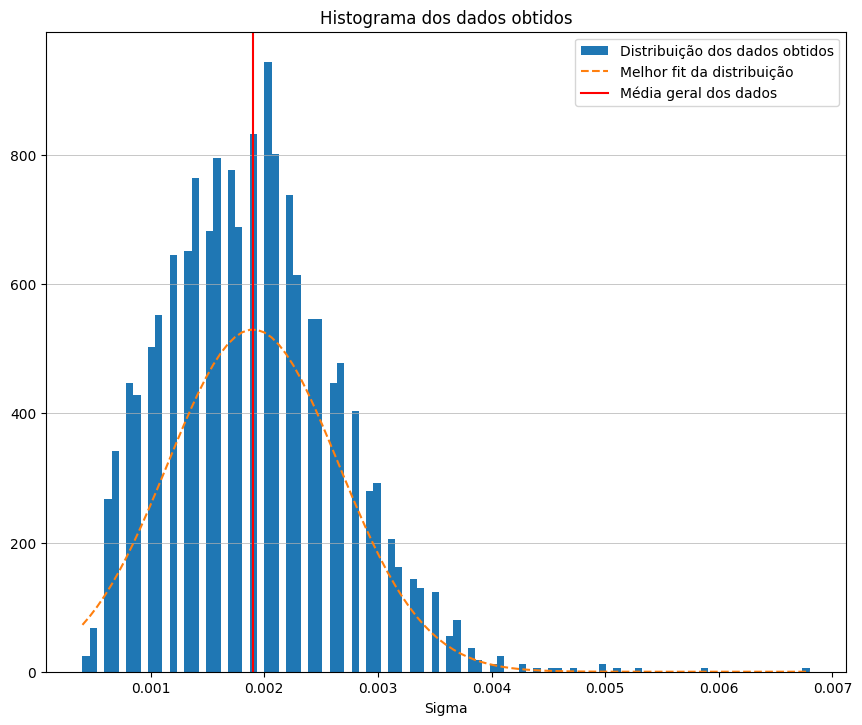

In [151]:
histogram('fixed_bins_size', sigmaFloat, 'Sigma', 'upper right', 100)

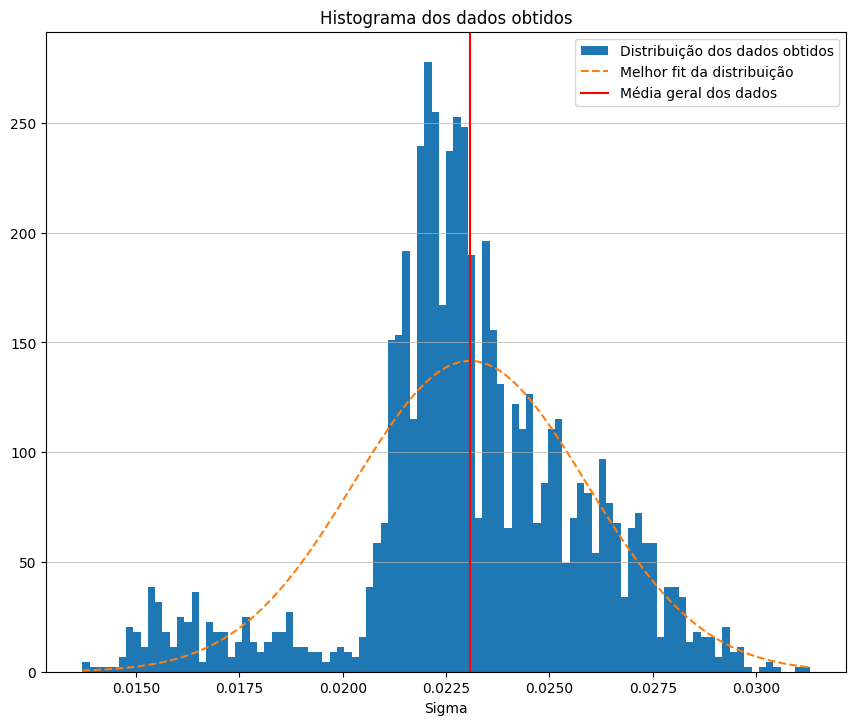

In [149]:
histogram('fixed_bins_size', lacFloat, 'Lacunaridade', 'upper right', 100)